In [4]:
# Useful for debugging
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Map1D_TM
---

In [5]:
from gpt.maps import Map1D_TM
cav = Map1D_TM('Buncher', 'fields/buncher_CTB_1D.gdf', frequency=1.3e9, scale=10e6, relative_phase=0)
?cav

Type:        Map1D_TM
String form:
Name: Buncher
Type: Map1D_TM
s-entrance: 0 m.
s-exit: 0.2 m.
Length: 0.2
Width: 0.2 m.
File:        ~/Documents/GitHub/lume-gpt/gpt/maps.py
Docstring:   Defines a 1D [z, Ez] cylindrically symmetric TM cavity field map object


# Basic Tracking routines
Checkingthe basic routines useful for working with a Map1D_TM object: `track_on_axis` and `auto_phase`.

First run the `track_on_axis`

In [6]:
#G = cav.track_on_axis(t=0, p=1e6, n_screen=100)

#fig, ax = plt.subplots(1, 3, sharex='col', constrained_layout=True, figsize=(12,4))
#ax[0].plot(cav.z0, cav.Ez0);
#ax[0].set_xlabel('$\Delta z$ (m)');
#ax[0].set_ylabel('Ez(z) (V/m)');
#ax[0].set_title('CBC Field Profile');

#cav.plot_floor(ax=ax[1])
#ax[1].plot(G.stat('mean_z','screen'), G.stat('mean_x', 'screen'));
#ax[1].plot(G.stat('mean_z','screen')[0], G.stat('mean_x', 'screen')[0],'og');
#ax[1].plot(G.stat('mean_z','screen')[-1], G.stat('mean_x', 'screen')[-1],'or');
#ax[1].set_title('Single Particle Tracking')

#ax[2].plot(G.stat('mean_z','screen'), G.stat('mean_energy', 'screen')/1e6);
#ax[2].set_xlabel('z (m)');
#ax[2].set_ylabel('E (MeV)');
#ax[2].set_title('Single Particle Tracking: Energy Gain');

# Autophasing

CPU times: user 5.68 s, sys: 580 ms, total: 6.26 s
Wall time: 953 ms


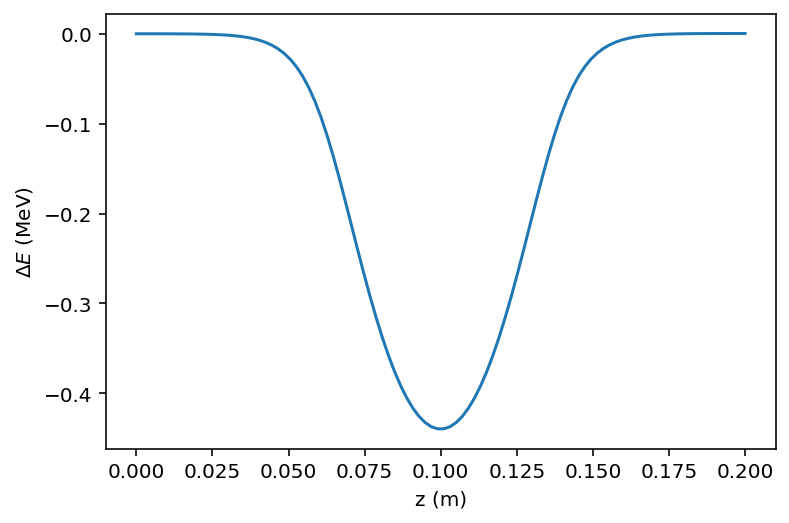

In [4]:
#p=10e6
#cav.relative_phase=-90

#%time G=cav.autophase(t=0, p=p)

#plt.plot(G.stat('mean_z','screen'), (G.stat('mean_energy', 'screen')-G.screen[0]['mean_energy'])/1e6);
#plt.xlabel('z (m)');
#plt.ylabel('$\Delta E$ (MeV)');

# Test Placement in a Lattice

In [7]:
from gpt.element import Lattice

In [8]:
lat = Lattice('cavity')
lat.add(Map1D_TM('Buncher', 'fields/buncher_CTB_1D.gdf', frequency=1.3e9, scale=10e6, relative_phase=0), ds=1.0)

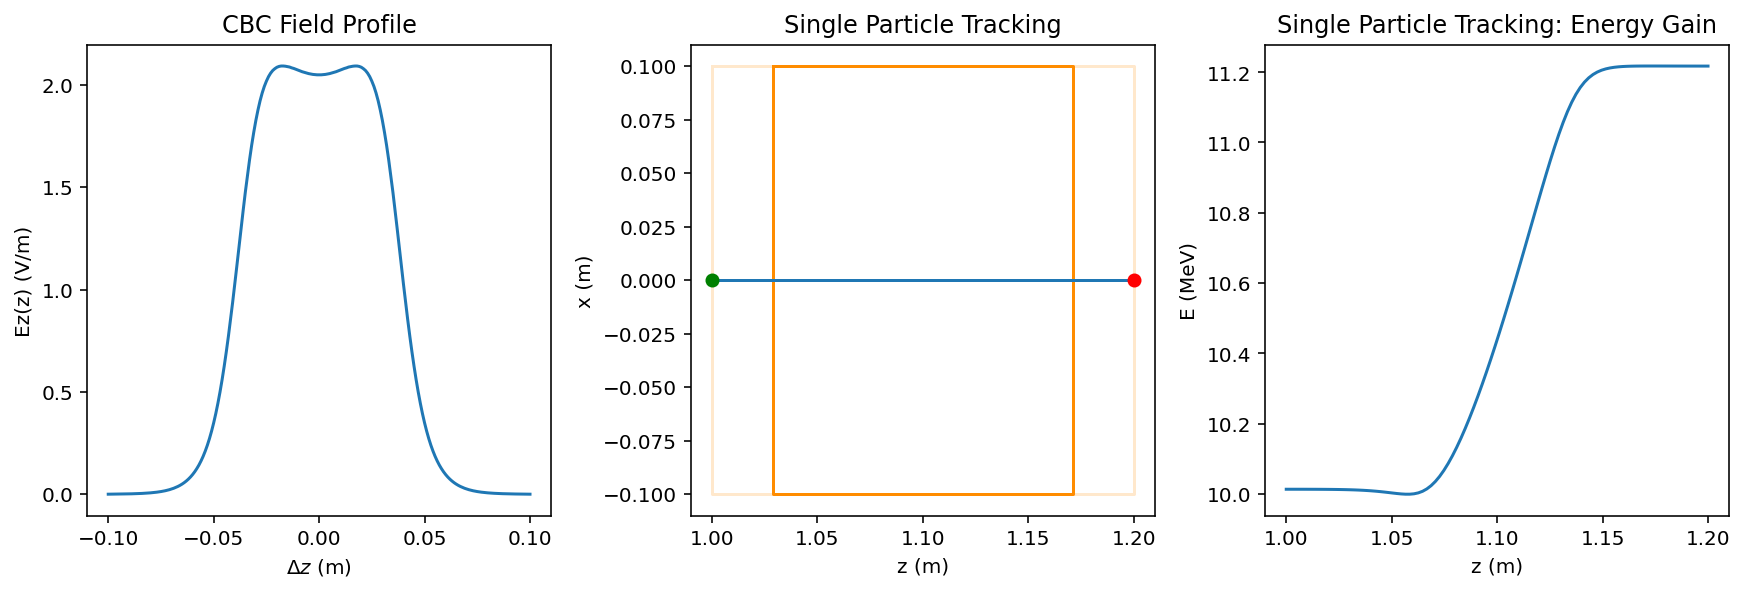

In [7]:
#G = lat['Buncher'].track_on_axis(t=0, p=10e6, n_screen=100)

#fig, ax = plt.subplots(1, 3, sharex='col', constrained_layout=True, figsize=(12,4))
#ax[0].plot(cav.z0, cav.Ez0);
#ax[0].set_xlabel('$\Delta z$ (m)');
#ax[0].set_ylabel('Ez(z) (V/m)');
#ax[0].set_title('CBC Field Profile');

#lat['Buncher'].plot_floor(ax=ax[1])
#ax[1].plot(G.stat('mean_z','screen'), G.stat('mean_x', 'screen'));
#ax[1].plot(G.stat('mean_z','screen')[0], G.stat('mean_x', 'screen')[0],'og');
#ax[1].plot(G.stat('mean_z','screen')[-1], G.stat('mean_x', 'screen')[-1],'or');
#ax[1].set_title('Single Particle Tracking')

#ax[2].plot(G.stat('mean_z','screen'), G.stat('mean_energy', 'screen')/1e6)
#ax[2].set_xlabel('z (m)');
#ax[2].set_ylabel('E (MeV)');
#ax[2].set_title('Single Particle Tracking: Energy Gain');

In [9]:
#lat['Buncher'].relative_phase=-90
#G = lat['Buncher'].autophase(t=0, p=10e6)
#plt.plot(G.stat('mean_z','screen'), (G.stat('mean_energy', 'screen')-G.screen[0]['mean_energy'])/1e6);
#plt.xlabel('z (m)');
#plt.ylabel('$\Delta E$ (MeV)');

In [10]:
for line in cav.gpt_lines():
    print(line)

Buncher_x = 0.0;
Buncher_y = 0.0;
Buncher_z = 0.1;
Buncher_scale = 10000000.0;
Buncher_oncrest_phase = 0;
Buncher_relative_phase = 0;
Buncher_phase = (Buncher_oncrest_phase + Buncher_relative_phase)*pi/180;
Buncher_frequency = 1300000000.0;
Buncher_gamma = 1;
Map1D_TM("wcs", Buncher_x, Buncher_y, Buncher_z, 1, 0, 0, 0, 1, 0, "/Users/colwyngulliford/Documents/GitHub/lume-gpt/examples/elements/fields/buncher_CTB_1D.gdf", "Z", "Ez", Buncher_scale, Buncher_phase, 2*pi*Buncher_frequency);


# Example Field Maps:
---



In [10]:
cav = Map1D_TM('CU_ICM', 'fields/icm_1d.gdf', frequency=1.3e9, scale=1, relative_phase=-90)
cav.relative_phase=+180

In [11]:
%time G=cav.autophase(t=0, p=p)

CPU times: user 5.55 s, sys: 586 ms, total: 6.14 s
Wall time: 921 ms


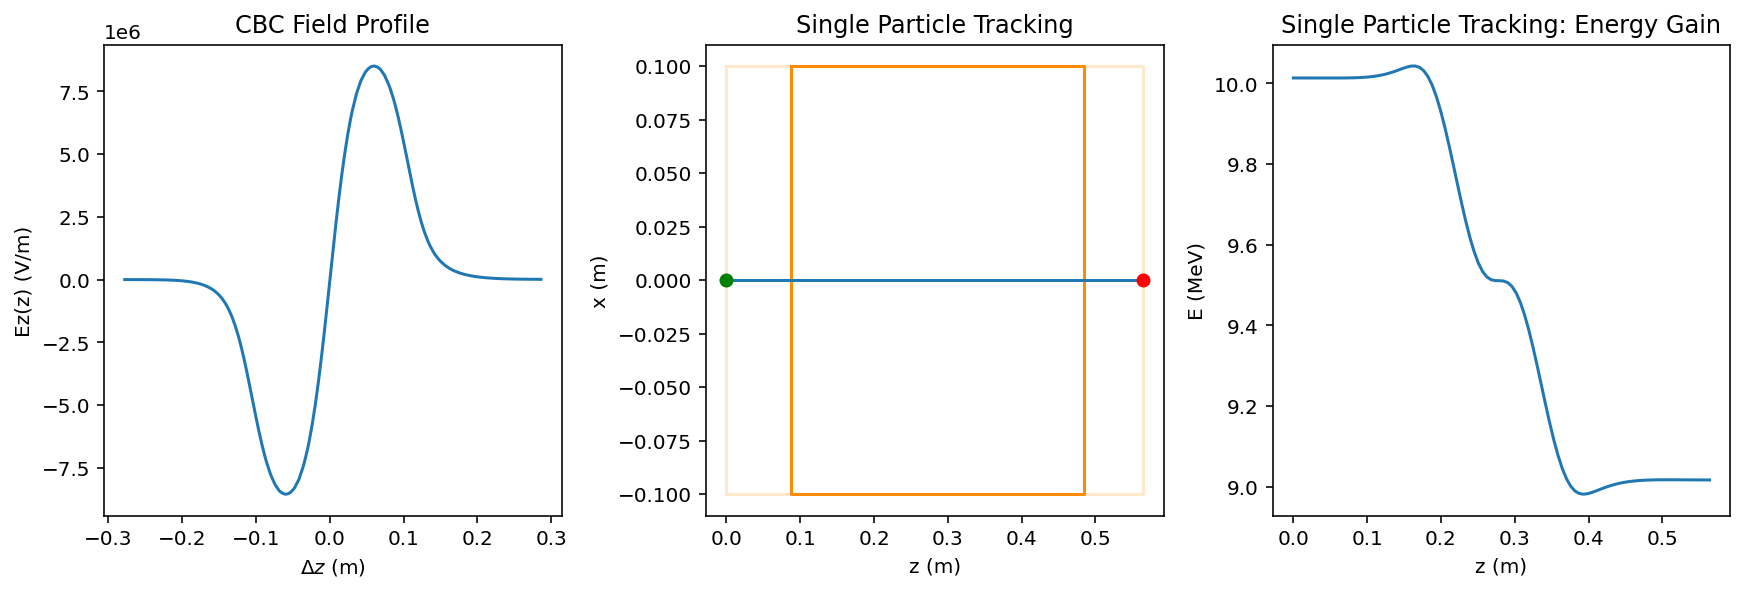

In [12]:
G = cav.track_on_axis(t=0, p=10e6, n_screen=100, workdir='temp')

fig, ax = plt.subplots(1, 3, sharex='col', constrained_layout=True, figsize=(12,4))
ax[0].plot(cav.z0, cav.Ez0);
ax[0].set_xlabel('$\Delta z$ (m)');
ax[0].set_ylabel('Ez(z) (V/m)');
ax[0].set_title('CBC Field Profile');

cav.plot_floor(ax=ax[1])
ax[1].plot(G.stat('mean_z','screen'), G.stat('mean_x', 'screen'));
ax[1].plot(G.stat('mean_z','screen')[0], G.stat('mean_x', 'screen')[0],'og');
ax[1].plot(G.stat('mean_z','screen')[-1], G.stat('mean_x', 'screen')[-1],'or');
ax[1].set_title('Single Particle Tracking')

ax[2].plot(G.stat('mean_z','screen'), G.stat('mean_energy', 'screen')/1e6)
ax[2].set_xlabel('z (m)');
ax[2].set_ylabel('E (MeV)');
ax[2].set_title('Single Particle Tracking: Energy Gain');